In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, box

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from shapely.geometry import box

## Загружаем данные

В качестве примера расчёт кудрявцевской модели на исторических данных

In [24]:
df = pd.read_csv('dataset_for_drawing.csv')

## Полезные функции

In [107]:


def plot_map(df_year, column, epsg=3035, part_world_to_plot='world', img_path=None, text=None, show=True, vmin=None, vmax=None):
    # lons = df_year.lon.unique()
    # dx = (lons[1] - lons[0]) / 2
    # lats = df_year.lat.unique()
    # dy = (lats[1] - lats[0]) / 2
    dx, dy = .5531, .5531
    geometry = [Polygon([(x-dx, y-dy),
                         (x+dx, y-dy),
                         (x+dx, y+dy),
                         (x-dx, y+dy)]) for x, y in zip(df_year.lon, df_year.lat)]

    geodf = gpd.GeoDataFrame(df_year, crs = 4326, geometry=geometry)
    
    
    polygon = box(36.1, 43., 41.7, 46.9)

    
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = gpd.clip(world, polygon)
    
    
    if part_world_to_plot == 'nothern':
        basemap = world.cx[:, 52:]
    elif part_world_to_plot == 'world':
        basemap = world
    elif part_world_to_plot == 'europe':
        basemap = world[world.continent == 'Europe'] 
        
        a = basemap.geometry.iloc[0]
        def restriction(x):
            x = x.bounds
            l1, r1 = x[0], x[2]
            l2, r2 = x[1], x[3]

            return (l1 > a.bounds[0] and r1 < a.bounds[2]) and (l2 > a.bounds[1] and r2 < a.bounds[3])

        geodf = geodf[geodf.geometry.apply(restriction) == True]
        
    elif part_world_to_plot == 'russia':
        europe = world[world.continent == 'Europe'] 
        basemap = europe[europe.name =='Russia']
        
        a = basemap.geometry.iloc[0]
        print(a.bounds)
        def restriction(x):
            x = x.bounds
            l1, r1 = x[0], x[2]
            l2, r2 = x[1], x[3]

            return (l1 > a.bounds[0] and r1 < a.bounds[2]) and (l2 > a.bounds[1] and r2 < a.bounds[3])

        geodf = geodf[geodf.geometry.apply(restriction) == True]
        
    basemap = basemap.to_crs(epsg=epsg)
    geodf = geodf.to_crs(epsg=epsg)
    
    f = plt.figure(dpi = 200)
    ax = f.gca()
    ax.set_facecolor('white')

    if vmin is None:
        vmin = df_year[column].min()
    
    if vmax is None:
        vmax = df_year[column].max()

    basemap.plot(ax=ax, color = '#CACACA')
    geodf.plot(ax = ax, column = column, legend=True,
              legend_kwds={'orientation': "horizontal",
                            'shrink': 0.5,
                            'extend': 'neither'
                          }, #cax=cax,
              vmin=0, vmax=0.5, aspect=0.5, edgecolor="face", linewidth=0.2, alpha=0.5, )

    if text is None:
        text = column
    plt.title(text)
    plt.axis('equal')
    plt.axis('off')
    if img_path is not None:
        plt.savefig(img_path, transparent=False, facecolor='w')
    if show:
        plt.show()

def plot_grid(ax, crs, color='black', linewidth=.5, alpha=0.1, xmin=-180, 
              xmax=179.999, ymin=-90, ymax=90, n=10, width=15, height=15):
    cols = list(np.arange(xmin, xmax + width, width))
    rows = list(np.arange(ymin, ymax + height, height))

    xlin = np.linspace(xmin, xmax, n*len(cols))
    ylin = np.linspace(ymin, ymax, n*len(rows))
    lines  = [LineString(zip([x]*(n*len(rows)), ylin)) for x in cols]
    lines += [LineString(zip(xlin, [y]*(n*len(cols)))) for y in rows]

    grid = gpd.GeoDataFrame(lines, crs=4326, geometry=lines)
    grid.to_crs(crs, inplace=True)

    grid.plot(ax=ax, color=color, linewidth=linewidth, alpha=0)

def plot_points(df, epsg=3035):
    polygon = box(-180, 23, 180, 90)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = gpd.clip(world, polygon)

    basemap = world.cx[:, 52:]
    basemap = basemap.to_crs(epsg=epsg)

    f = plt.figure(dpi = 200)
    ax = f.gca()
    basemap.plot(ax=ax, color = '#CACACA')

    pts = gpd.points_from_xy(df.lon, df.lat)
    pts = gpd.GeoDataFrame(pts)
    pts = pts.set_geometry(0)
    pts.crs = 4326

    pts = pts.to_crs(basemap.crs)
    pts.plot(ax=ax, markersize=1, color='#373F51')
    plt.axis('off')

In [26]:
df = df.reset_index().drop(columns = ["Unnamed: 0"])
df

,index,year,lon,lat,Probability_of_hail
0,0,2022.0,19.125,42.05582,0.085490
1,1,2022.0,19.125,43.17731,0.052279
2,2,2022.0,19.125,44.29879,0.054191
3,3,2022.0,19.125,45.42028,0.041125
4,4,2022.0,19.125,46.54176,0.047650
...,...,...,...,...,...
142907,142907,2050.0,191.250,72.33558,0.074833
142908,142908,2050.0,191.250,73.45701,0.098267
142909,142909,2050.0,191.250,74.57843,0.058211
142910,142910,2050.0,191.250,75.69984,0.062473


In [27]:
years = sorted(list(df['year'].unique()))

In [28]:
print("hello world")

hello world


In [ ]:
[df["lon"] < 46][df["lon"] > 42][df["lat"]< 100][df["lat"] > 36]

Рисуем одно изображение чтобы посмотреть как оно выглядит

C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\2062097860.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], 'Probability_of_hail', text=f'max prob, year={year}')


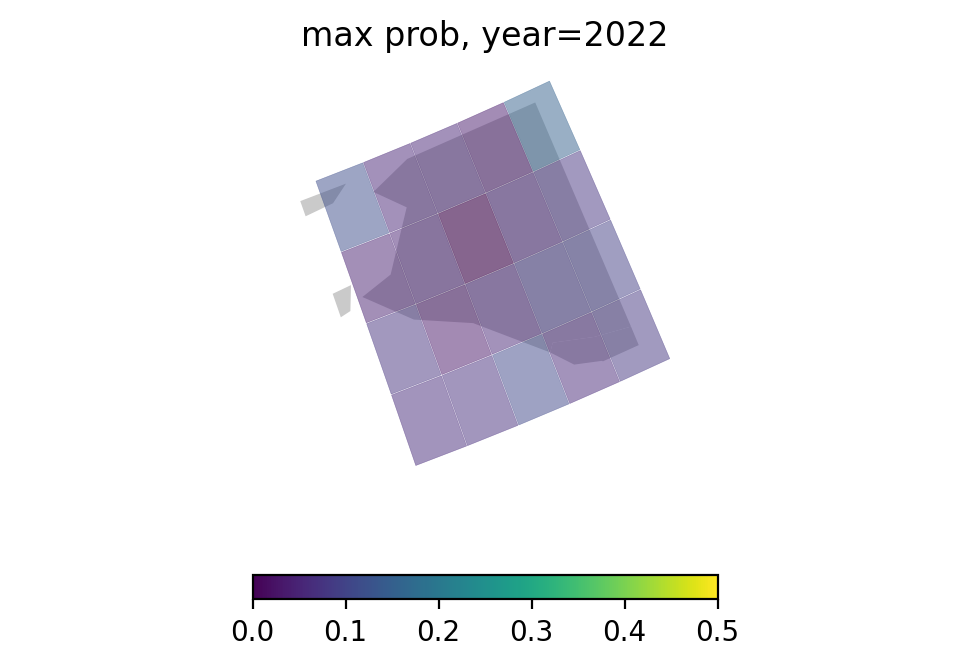

In [108]:
# todo: поставить границы Краснодарского края 
year = 2022
plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], 'Probability_of_hail', text=f'max prob, year={year}')

## Сохраняем изображения
нужно создать папку anim

In [109]:
column = 'Probability_of_hail'

#vmin = df[column].min()
#vmax = df[column].max()
for year in years:
    year = int(year)
    plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column, 
             img_path=f'anim/a_{year}_1.jpg', text=f'max prob, year={year}',
             show=False)
    print(year)
    plt.close()

C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2022


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2023


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2024


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2025


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2026


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2027


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2028


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2029


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2030


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2031


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2032


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2033


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2034


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2035


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2036


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2037


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2038


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2039


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2040


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2041


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2042


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2043


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2044


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2045


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2046


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2047


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2048


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2049


C:\Users\Иван\AppData\Local\Temp\ipykernel_23128\961010892.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_map(df[df['year'] == year][df["lon"] < 41.7][df["lon"] > 36.1][df["lat"]< 46.9][df["lat"] > 43], column,


2050


<AxesSubplot:>

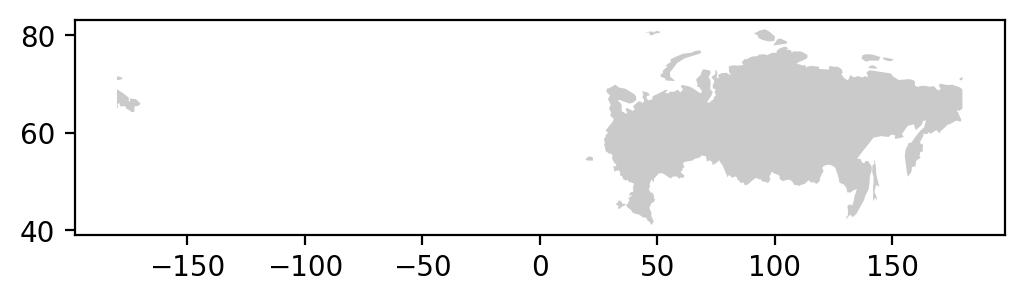

In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
polygon = box(36.1, 43., 41.7, 46.9)
#world = gpd.clip(world, polygon)
europe = world[world.continent == 'Europe'] 
basemap = europe[europe.name =='Russia']
f = plt.figure(dpi = 200)
ax = f.gca()
ax.set_facecolor('white')
basemap.plot(ax=ax, color = '#CACACA')

In [69]:
d = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
d[d.name == "Krasnodar"]

,name,geometry


Далее выполняем эту команду (нужна программа ffmpeg, на linux её можно установить с помощью ``sudo apt install ffmpeg``):

``ffmpeg -start_number 1900 -framerate 10 -i anim/%d.jpg out.gif``